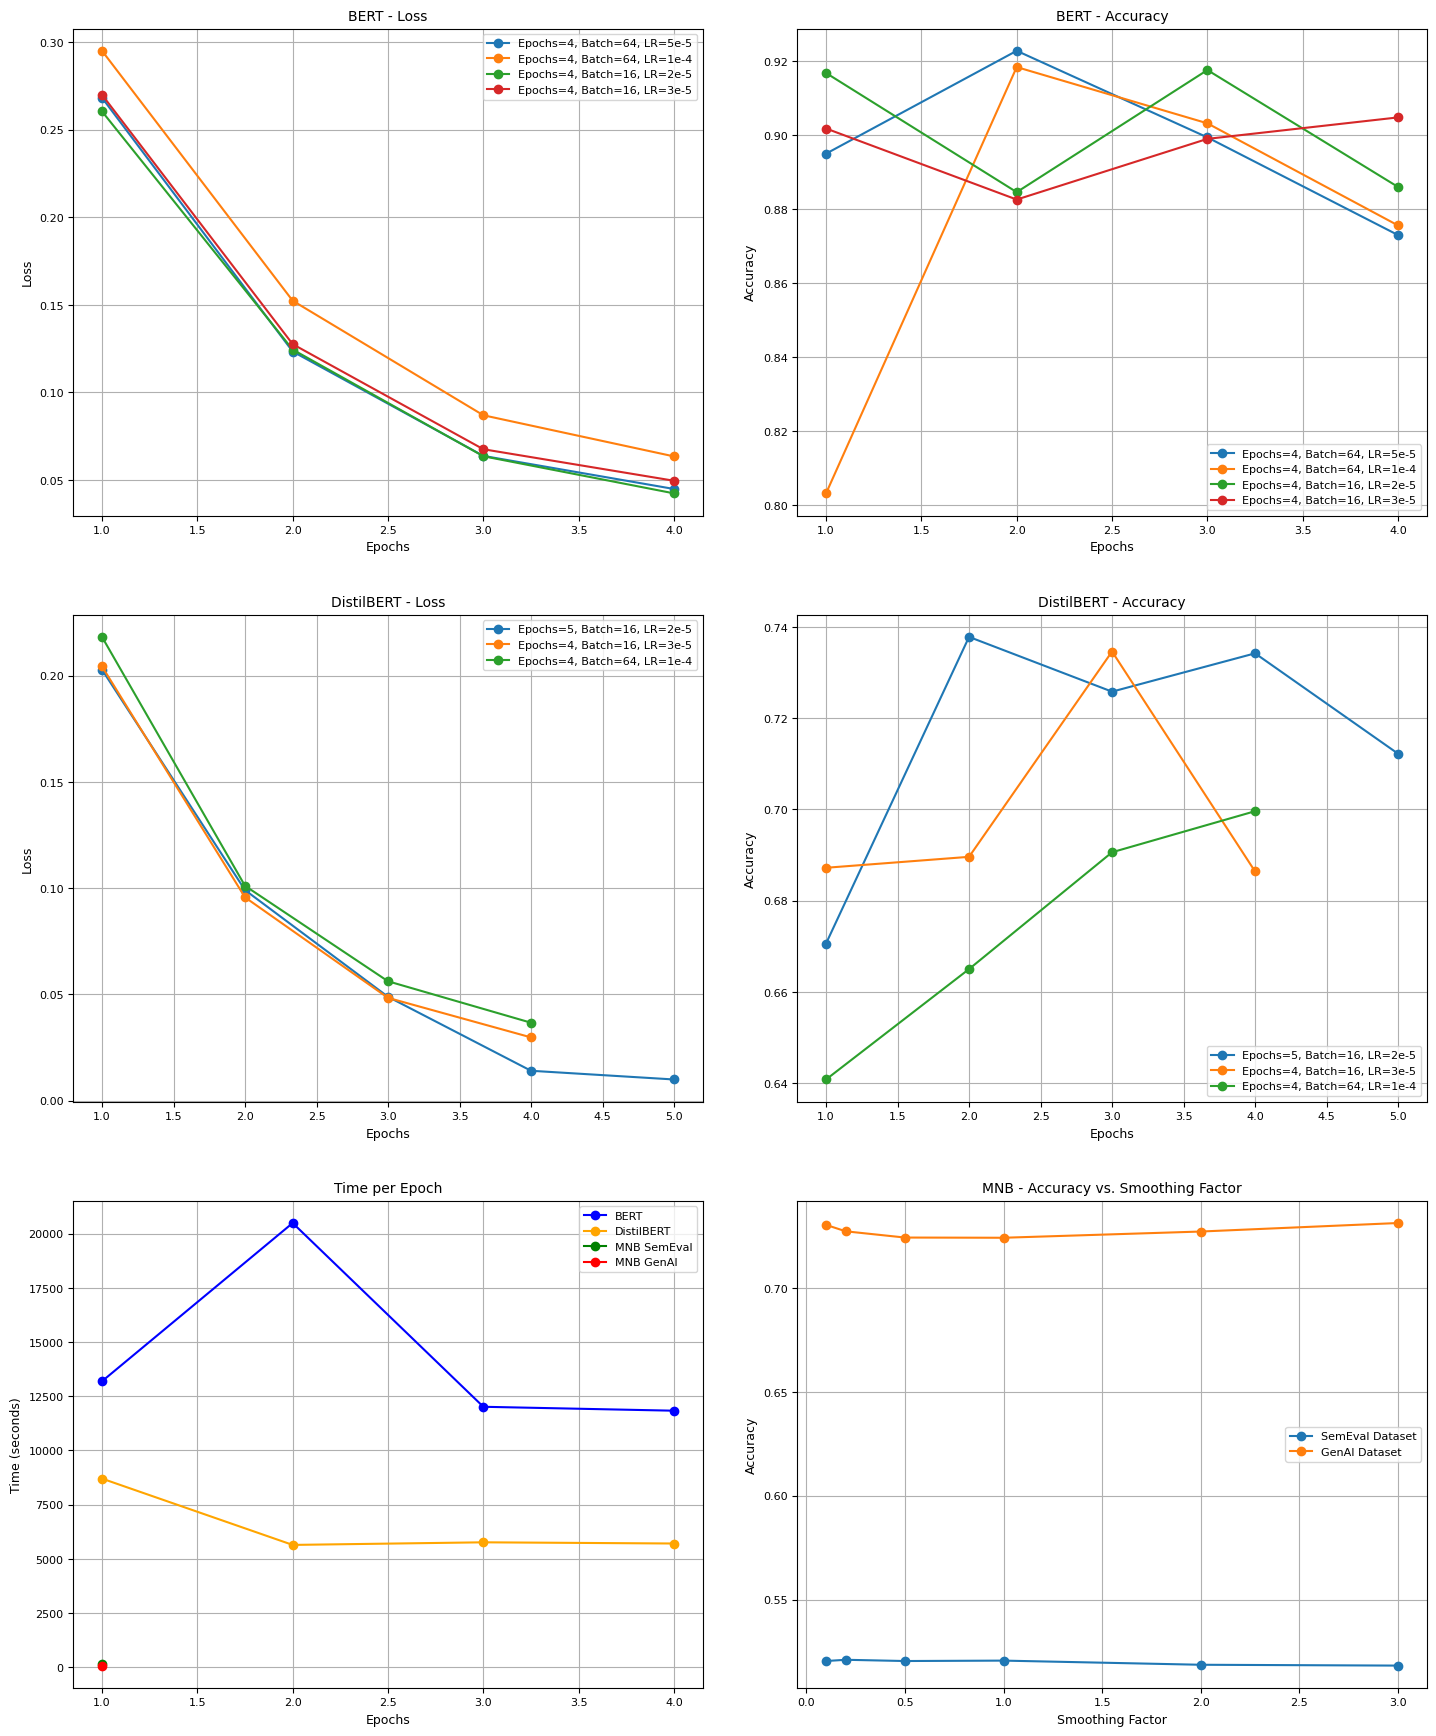

In [1]:
import matplotlib.pyplot as plt  # for plotting

# Hyperparameter tuning metrics for BERT performance
bert_data = {
    # 4 epochs, batch size of 64, learning rate 5e-5
    "Epochs=4, Batch=64, LR=5e-5": {
        "loss": [0.2683, 0.1234, 0.0638, 0.0449],  # loss values over epochs
        "accuracy": [0.8950, 0.9228, 0.8994, 0.8730],  # accuracy values over epochs
    },
    # 4 epochs, batch size of 64, learning rate 1e-4
    "Epochs=4, Batch=64, LR=1e-4": {
        "loss": [0.2951, 0.1524, 0.0870, 0.0635],
        "accuracy": [0.8032, 0.9184, 0.9032, 0.8756],
    },
    # 4 epochs, batch size of 16, learning rate 2e-5
    "Epochs=4, Batch=16, LR=2e-5": {
        "loss": [0.2605, 0.1245, 0.0636, 0.0424],
        "accuracy": [0.9168, 0.8846, 0.9176, 0.8860],
    },
    # 4 epochs, batch size of 16, learning rate 3e-5
    "Epochs=4, Batch=16, LR=3e-5": {
        "loss": [0.2700, 0.1276, 0.0676, 0.0496],
        "accuracy": [0.9018, 0.8826, 0.8990, 0.9048],
    },
}

# Hyperparameter tuning metrics for DistilBERT performance
distilbert_data = {
    # 5 epochs, batch size of 16, learning rate 2e-5
    "Epochs=5, Batch=16, LR=2e-5": {
        "loss": [0.2028, 0.0991, 0.0489, 0.0141, 0.0100],
        "accuracy": [0.6706, 0.7378, 0.7258, 0.7342, 0.7122],
    },
    # 4 epochs, batch size of 16, learning rate 3e-5
    "Epochs=4, Batch=16, LR=3e-5": {
        "loss": [0.2043, 0.0957, 0.0484, 0.0298],
        "accuracy": [0.6872, 0.6896, 0.7346, 0.6864],
    },
    # 4 epochs, batch size of 64, learning rate 1e-4
    "Epochs=4, Batch=64, LR=1e-4": {
        "loss": [0.2182, 0.1011, 0.0562, 0.0367],
        "accuracy": [0.6408, 0.6650, 0.6906, 0.6996],
    },
}

# Hyperparameter tuning metrics for Multinomial Naive Bayes (MNB) performance
mnb_data = {
    # Accuracy values for SemEval Dataset with different smoothing factors
    "SemEval Dataset": {
        "smoothing_factors": [0.1, 0.2, 0.5, 1.0, 2.0, 3.0],
        "accuracy": [0.5204, 0.5210, 0.5204, 0.5206, 0.5186, 0.5182],
    },
    # Accuracy values for GenAI Dataset with different smoothing factors
    "GenAI Dataset": {
        "smoothing_factors": [0.1, 0.2, 0.5, 1.0, 2.0, 3.0],
        "accuracy": [0.7305, 0.7274, 0.7244, 0.7243, 0.7273, 0.7314],
    },
}

# Training time per epoch for BERT and DistilBERT (HH:MM:SS format)
time_data = {
    "BERT": [
        (1, "3:39:52"), (2, "5:41:30"), (3, "3:20:16"), (4, "3:17:15")
    ],
    "DistilBERT": [
        (1, "2:25:04"), (2, "1:34:06"), (3, "1:36:06"), (4, "1:35:11")
    ],
}

# Function to convert time strings into seconds
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(":"))  # split time string into hours, minutes and seconds
    return h * 3600 + m * 60 + s  # convert time into seconds

# Convert time for BERT and DistilBERT to seconds for plotting
bert_times = [time_to_seconds(t[1]) for t in time_data["BERT"]]  # training time (in seconds) per epoch for BERT
distilbert_times = [time_to_seconds(t[1]) for t in time_data["DistilBERT"]]  # training time (in seconds) per epoch for DistilBERT
MNB_semeval_time = [144.67]
MNB_genai_time = [80.97]

# 3x2 grid of subplots for combined plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot BERT metrics (Loss and Accuracy) on first row
for idx, metric in enumerate(["loss", "accuracy"]):
    ax = axes[0, idx]  # access appropriate subplot
    for label, values in bert_data.items():
        # Plot metrics (loss, accuracy) for each set of hyperparameter tuning
        ax.plot(range(1, len(values[metric]) + 1), values[metric], marker='o', label=label)
    ax.set_title(f"BERT - {metric.capitalize()}", fontsize=10)  # add title
    ax.set_xlabel("Epochs", fontsize=9)  # add x label
    ax.set_ylabel(metric.capitalize(), fontsize=9)  # add y label
    ax.legend(fontsize=8)  # add legend
    ax.grid(True)  # add grid
    ax.tick_params(axis='both', labelsize=8)  # ticks at labels

# Plot DistilBERT metrics (Loss and Accuracy) on second row
for idx, metric in enumerate(["loss", "accuracy"]):
    ax = axes[1, idx]
    for label, values in distilbert_data.items():
        ax.plot(range(1, len(values[metric]) + 1), values[metric], marker='o', label=label)
    ax.set_title(f"DistilBERT - {metric.capitalize()}", fontsize=10)
    ax.set_xlabel("Epochs", fontsize=9)
    ax.set_ylabel(metric.capitalize(), fontsize=9)
    ax.legend(fontsize=8)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=8)

# Plot time per epoch for BERT and DistilBERT on third row, first column
ax = axes[2, 0]
ax.plot(range(1, len(bert_times) + 1), bert_times, marker='o', label="BERT", color="blue") # training time for BERT
ax.plot(range(1, len(distilbert_times) + 1), distilbert_times, marker='o', label="DistilBERT", color="orange") # training time for DistilBERT
ax.plot(range(1, len(MNB_semeval_time) + 1), MNB_semeval_time, marker='o', label="MNB SemEval", color="green") # training time for MNB SemEval
ax.plot(range(1, len(MNB_genai_time) + 1), MNB_genai_time, marker='o', label="MNB GenAI", color="red") # training time for MNB GenAI
ax.set_title("Time per Epoch", fontsize=10)
ax.set_xlabel("Epochs", fontsize=9)
ax.set_ylabel("Time (seconds)", fontsize=9)
ax.legend(fontsize=8)
ax.grid(True)
ax.tick_params(axis='both', labelsize=8)

# Plot MNB accuracy vs. smoothing factors on third row, second column
ax = axes[2, 1]
for dataset, values in mnb_data.items():
    ax.plot(values["smoothing_factors"], values["accuracy"], marker='o', label=dataset)
ax.set_title("MNB - Accuracy vs. Smoothing Factor", fontsize=10)
ax.set_xlabel("Smoothing Factor", fontsize=9)
ax.set_ylabel("Accuracy", fontsize=9)
ax.legend(fontsize=8)
ax.grid(True)
ax.tick_params(axis='both', labelsize=8)

plt.tight_layout(pad=3.0)  # add padding between subplots (for no overlap between plots)
plt.show()  # display plots